# k-Nearest Neighbor by hand  
# Data set-up

##### Generic code  

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

##### Custom code

In [2]:
import lib.read_csv_to_dict as rc  #reads csv to a list of dictionaries
import lib.train_test as tt #splits data set into training and test sets
import lib.normalize as normalize #normalizes and standardizes aspects
import lib.my_knn as knn #calculate knn and write to csv

##### Read csv to a list of dictionaries

In [3]:
a = rc.csv_to_dict('data/wdbc.csv')

##### Split data set to train and test sets

In [4]:
train, test = tt.train_test(a,'diagnosis')

##### Normalize and standardize aspects  
The aspect chosen for this study are non-normal. In theory, points with larger aspect values will appear to have greater magnitudes, relative to points with smaller aspect values.

In [5]:
all_data, train, test = normalize.normalize(train, test, 'diagnosis',
                                  'mean_radius', 'mean_concave_points')

In [6]:
all_data =  df = pd.DataFrame(all_data, columns=['class', 'a1', 'a2',
                             'a1_1', 'a2_1', 'a1_T', 'a2_T',
                             'aspect_1', 'aspect_2'])

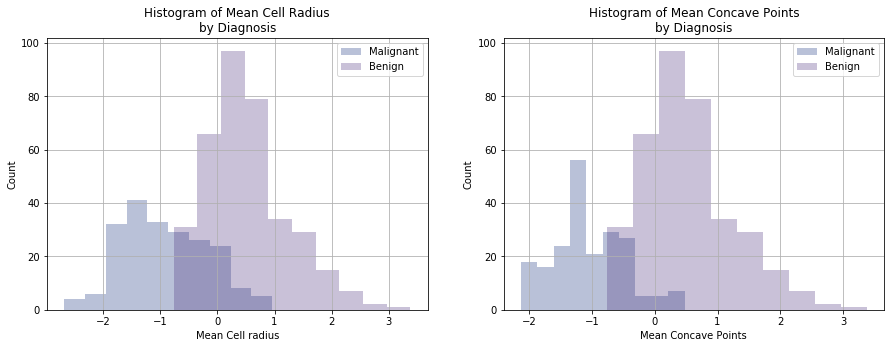

In [7]:
#set up figure
plt.figure(figsize=(15,5))
#set up histograms of data, by diagnosis.
plt.subplot(121)
plt.hist(all_data[all_data['class']=='M'].aspect_1,
         color=(0.1, 0.2, 0.5, 0.3), label='Malignant')
plt.hist(all_data[all_data['class']=='B'].aspect_1,
         color=(0.3, 0.2, 0.5, 0.3),label='Benign')
plt.title('Histogram of Mean Cell Radius\nby Diagnosis')
plt.xlabel('Mean Cell radius')
plt.ylabel('Count')
plt.legend()
plt.grid()

#histogram of mean concave points
plt.subplot(122)
plt.hist(all_data[all_data['class']=='M'].aspect_2,
         color=(0.1, 0.2, 0.5, 0.3),label='Malignant')
plt.hist(all_data[all_data['class']=='B'].aspect_1,
         color=(0.3, 0.2, 0.5, 0.3),label='Benign')
plt.title('Histogram of Mean Concave Points\nby Diagnosis')
plt.xlabel('Mean Concave Points')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


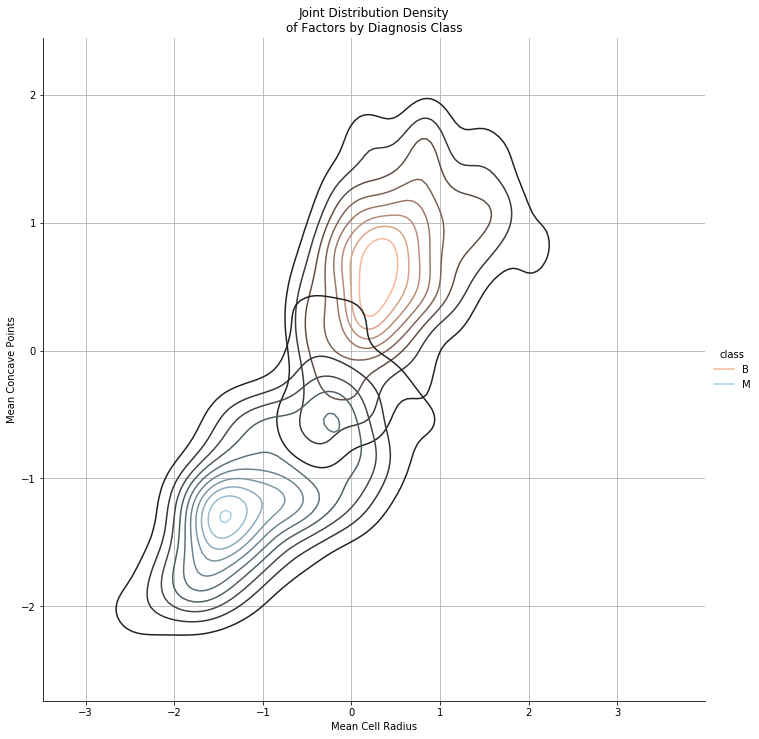

In [8]:
np.warnings.filterwarnings('ignore') #ignore warnings
#seabon facetgrid and kernel density estimation(kde) plot
g = sns.FacetGrid(df, hue='class', palette='RdBu', height=10)
g.map(sns.kdeplot, 'aspect_1', 'aspect_2')
g.add_legend()
plt.title('Joint Distribution Density\nof Factors by Diagnosis Class')
plt.xlabel('Mean Cell Radius')
plt.ylabel('Mean Concave Points')
plt.grid()
plt.show()

##### Calculate magnitudes and k nearest neighbors  
Since iterating through the data set can take some time, iteration is move to thid distinct notebook and the results are written to a csv file.

In [9]:
df = knn.knn(train, test,'class', 'aspect_1', 'aspect_2', 'M', 'B')